<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Classifier's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/heart.csv'

df = pd.read_csv(url)

In [3]:
df.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
print('Tipo de objetivos ^ cantidad:\n{}'.format(df.target.value_counts()))

Tipo de objetivos ^ cantidad:
1    165
0    138
Name: target, dtype: int64


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


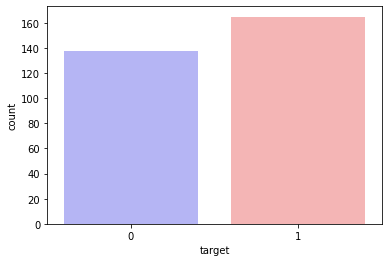

In [6]:
'''
selecionamos puntos importantes: dolor de pecho[cp], oldpeak...
'''

sns.countplot(x = df.target, data = df, palette='bwr')

In [7]:
# percentage of the target

_0 = len(df[df.target == 0])
_1 = len(df[df.target == 1])

print('Percentage of patients have heart diases: {:.2f}'.format((_0/ df.shape[0])*100))
print("Percentage of patients haven't heart diases: {:.2f} ".format((_1/df.shape[0])*100))

Percentage of patients have heart diases: 45.54
Percentage of patients haven't heart diases: 54.46 


1    207
0     96
Name: sex, dtype: int64


Text(0.5, 1.0, '0 -> female | 1 -> male')

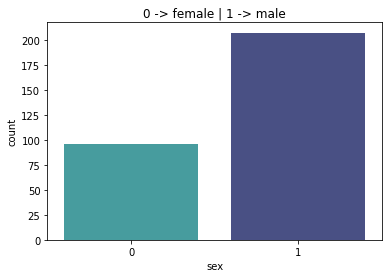

In [8]:
print(df.sex.value_counts())

sns.countplot(x=df.sex, data=df, palette='mako_r')
plt.title('0 -> female | 1 -> male')

In [9]:
# Percentage of sex

_f = len(df[df.sex == 0])
_m = len(df[df.sex == 1])

print('Percentage of patients females: {:.2f}'.format((_f / df.shape[0]) * 100))
print('Amount of the patients females: {}'.format(_f))
print('Percentage of patients males: {:.2f}'.format((_m / df.shape[0]) * 100))
print('Amount of the patients males: {}'.format(_m))


Percentage of patients females: 31.68
Amount of the patients females: 96
Percentage of patients males: 68.32
Amount of the patients males: 207


In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


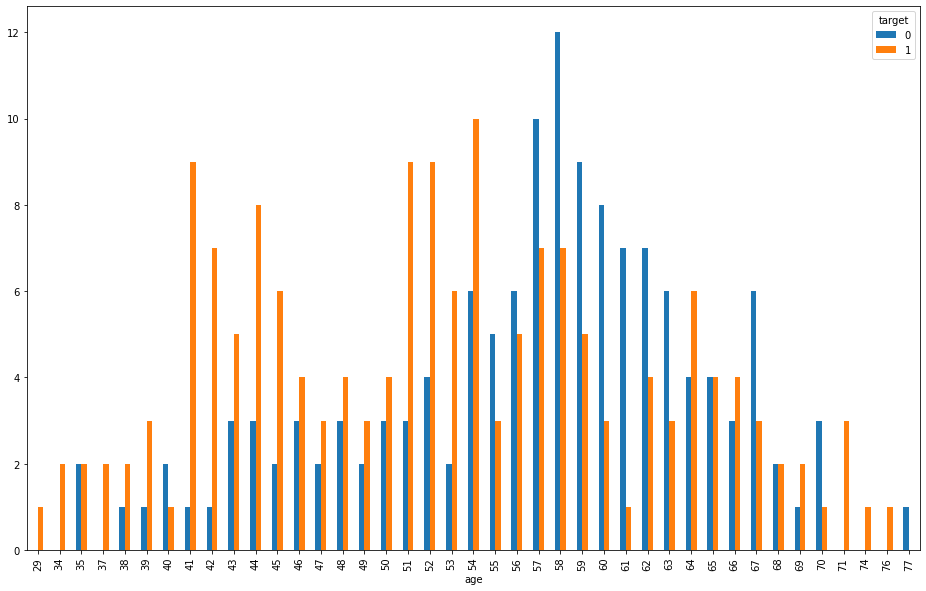

In [11]:
age_target = pd.crosstab(df.age, df.target)
# contamos target segun el anio
age_target.plot(kind='bar', figsize=(16,10))

Text(0, 0.5, 'target')

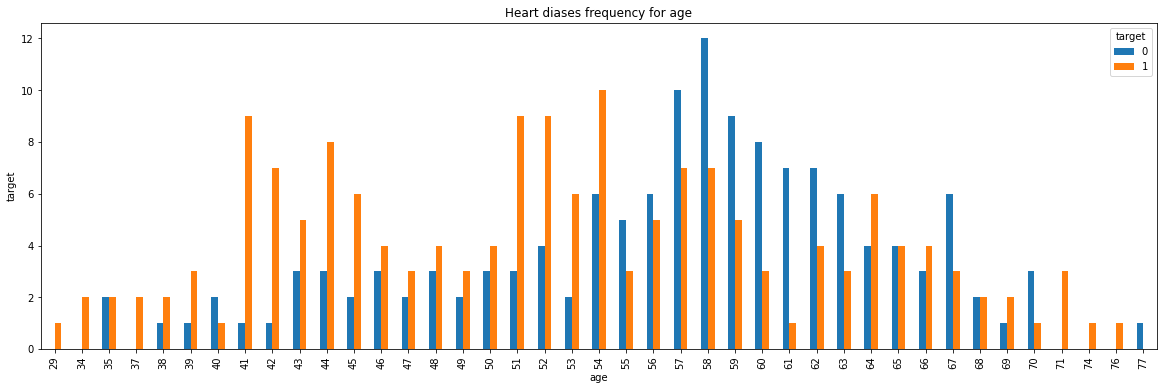

In [12]:
# podemos graficarlo de esta otra manera
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart diases frequency for age')
plt.xlabel('age')
plt.ylabel('target')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Amount of patients females haven't diases: 24
Amount of patinets males haven't diases: 114
Amount of patients females haven diases: 72
Amount of patients males haven diases: 93


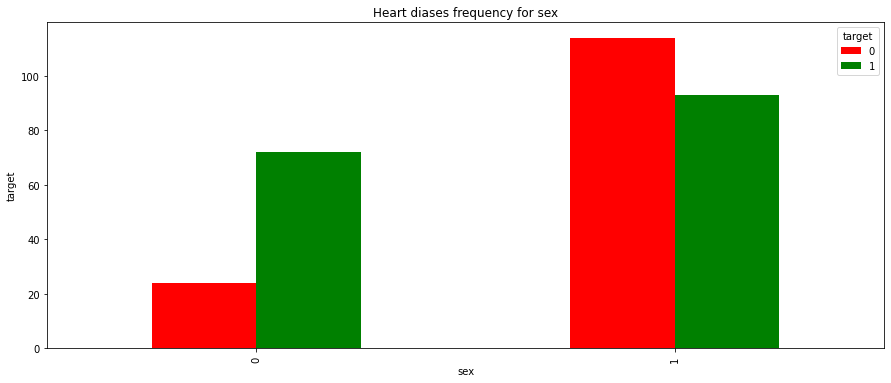

In [13]:
femaleNodiases = len(df[df.target == 0][df.sex == 0])
maleNodiases = len(df[df.target == 0][df.sex == 1])

femaleYesdiases = len(df[df.target==1][df.sex==0])
maleYesdiases = len(df[df.target==1][df.sex==1])

print("Amount of patients females haven't diases: {}".format(femaleNodiases))
print("Amount of patinets males haven't diases: {}".format(maleNodiases))

print('Amount of patients females haven diases: {}'.format(femaleYesdiases))
print("Amount of patients males haven diases: {}".format(maleYesdiases))

pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6), color=['red', 'green'])
plt.title('Heart diases frequency for sex')
plt.xlabel('sex')
plt.ylabel('target')
plt.show()

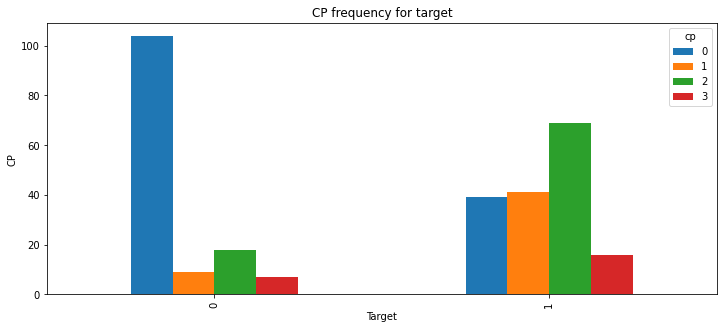

In [14]:
pd.crosstab(df.target, df.cp).plot(kind='bar', figsize=(12,5))
plt.title('CP frequency for target')
plt.xlabel('Target')
plt.ylabel('CP')
plt.show()

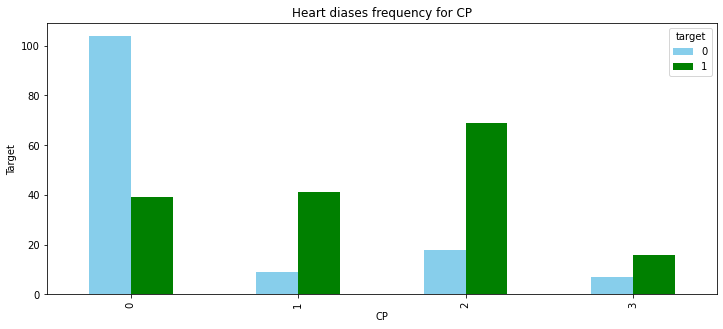

In [15]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(12,5), color=['skyblue','green'])
plt.title('Heart diases frequency for CP')
plt.xlabel('CP')
plt.ylabel('Target')
plt.show()

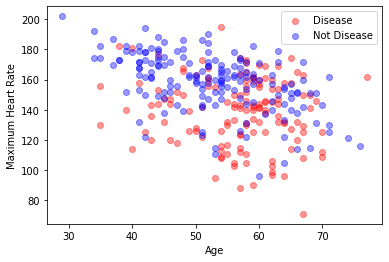

In [16]:
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c='red', alpha=.4)
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c='blue', alpha=.4)
plt.legend(['Disease', 'Not Disease'], loc=1)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

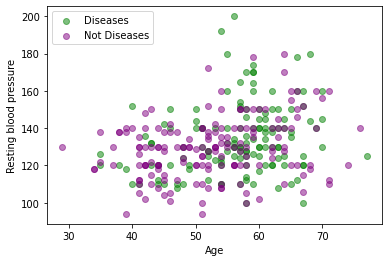

In [17]:
plt.scatter(df.age[df.target == 0], df.trestbps[df.target == 0], c='green', alpha=.5)
plt.scatter(df.age[df.target == 1], df.trestbps[df.target == 1], c='purple', alpha=.5)
plt.legend(['Diseases', 'Not Diseases'], loc=2)
plt.xlabel('Age')
plt.ylabel('Resting blood pressure')
plt.show()

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0, 0.5, 'fasting blood sugar > 120 mg/dl')

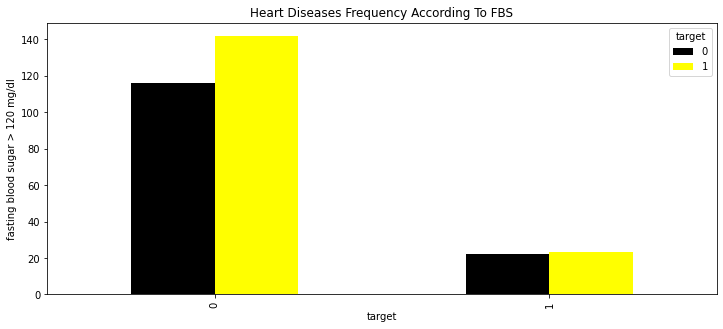

In [19]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(12,5), color=['black', 'yellow'])
plt.title('Heart Diseases Frequency According To FBS')
plt.xlabel('target')
plt.ylabel('fasting blood sugar > 120 mg/dl')

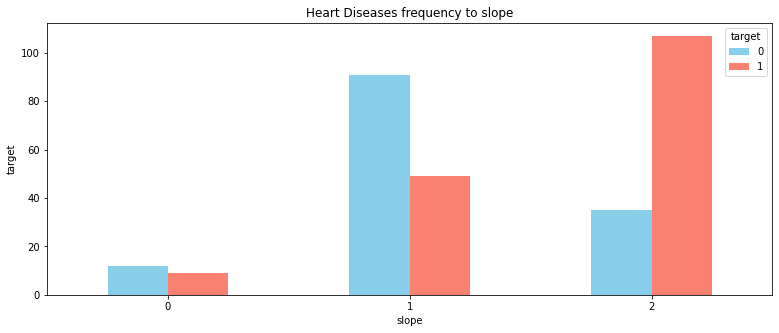

In [20]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(13,5), color=['skyblue', 'salmon'])
plt.title('Heart Diseases frequency to slope')
plt.xticks(rotation=0)
plt.xlabel('slope')
plt.ylabel('target')
plt.show()

In [21]:
# creating variables dummies cp, thal, slope

a = pd.get_dummies(df.cp, prefix='cp')
b = pd.get_dummies(df.thal, prefix='thal')
c = pd.get_dummies(df.slope, prefix='slope')

# union de data
frames = [df, a, b, c]

heart_diase = pd.concat(frames, axis=1)
heart_diase.tail()

heart_diase = heart_diase.drop(columns = ['cp', 'thal', 'slope'])
heart_diase.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [22]:
# Creating model logistic regression
y = df.target.values
X_data = heart_diase.drop(['target'], axis=1)
X_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1


In [23]:
# Normalize Data
X = (X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
# split our data with 80% train ^ 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Transposed matrices
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [35]:
# Initialize
# weight = .01, bias = 0.0
def initialize(dimension):

  weight = np.full((dimension, 1), 0.01)
  # crea matriz np.full((ROWS, COLUMNS), CONTENIDO)
  bias = 0.0
  return weight, bias

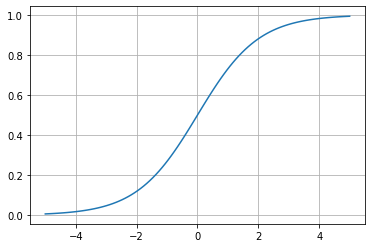

In [26]:
# Sigmoid Function
def sigmoid(z):
  
  y_head = 1 / (1 + np.e**(-z))
  return y_head

_ = np.linspace(-5,5,100)
plt.plot(_, sigmoid(_))
plt.grid()

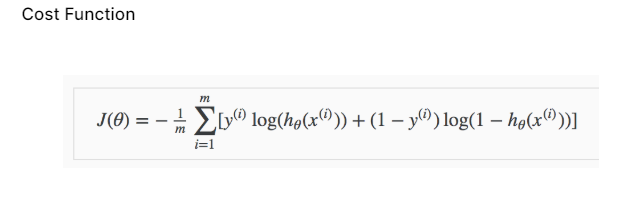



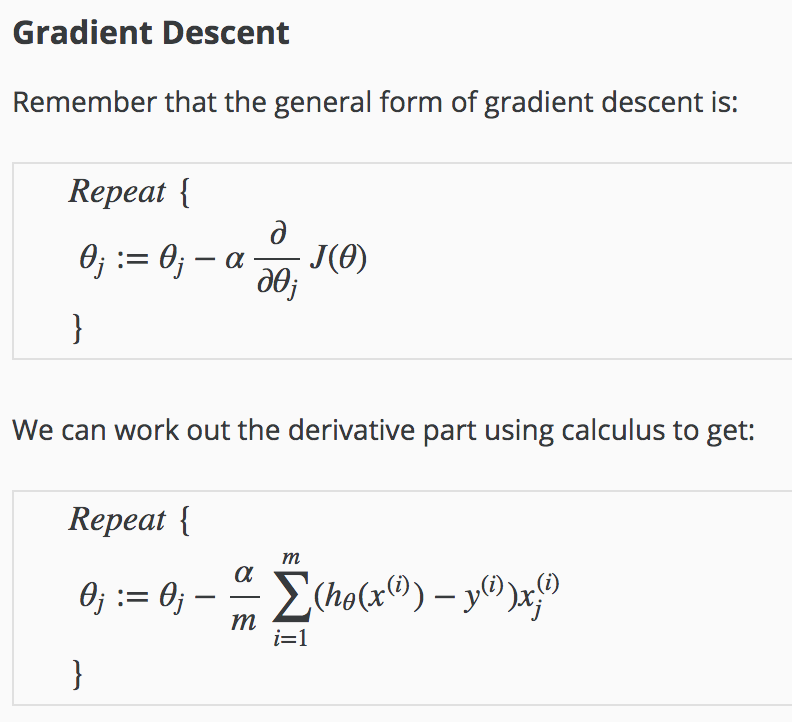

In [27]:
# Forward and Backward Propagation
'''
By the way in formulas;

h0(x^i)= y_head
y^i = y_train
x^i = x_train
'''

def forwardBackward(weight, bias, X_train, y_train):

  # Forward
  y_head = sigmoid(np.dot(weight.T, X_train) + bias)
  loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
  cost = sum(loss) / X_train.shape[1]  

  # Backward
  derivative_weight = np.dot(X_train, ((y_head - y_train).T)) / X_train.shape[1]
  derivative_bias = np.sum(y_head - y_train) / X_train.shape[1]
  gradients = {'Derivative weights':derivative_weight, 'Derivative bias':derivative_bias}

  return cost, gradients

In [28]:
def Update(weight, bias, X_train, y_train, learningRate, iteration):

  costList = []
  index = []

  # for each iteration, update weight and bias values
  for i in range(iteration):

    cost, gradients = forwardBackward(weight, bias, X_train, y_train)
    weight = weight - (learningRate * gradients['Derivative weights'])
    bias = bias - (learningRate * gradients['Derivative bias'])

    costList.append(cost)
    index.append(i)

  parameters = {'weight':weight, 'bias':bias}

  print('Iteration: {}'.format(iteration))
  print('Cost: {}'.format(cost))

  plt.plot(index, costList)
  plt.xlabel('Number of iteration')
  plt.ylabel('Cost')
  plt.show()

  return parameters, gradients

In [29]:
def predict(weight, bias, X_test):

  z = np.dot(weight.T, X_test) + bias
  y_head = sigmoid(z)

  y_prediction = np.zeros((1, X_test.shape[1]))

  for i in range(y_head.shape[1]):

    if y_head[0,i] <= 0.5:
    
      y_prediction[0,i] = 0
    
    else:

      y_prediction[0,i] = 1

    return y_prediction

In [30]:
def logistic_regression(X_train, y_train, X_test, y_test, learningRate, iteration):

  dimension = X_train.shape[0]
  weight, bias = initialize(dimension)

  parameters, gradients = Update(weight, bias, X_train, y_train, learningRate, iteration)

  y_prediction = predict(parameters['weight'], parameters['bias'], X_test)

  print('Test Accuracy: {:.2f}'.format((100 - np.mean(np.abs(y_prediction - y_test)) * 100)))

Iteration: 100
Cost: [1.93831376e-04 4.69356907e-04 3.95135825e-04 3.86373628e-03
 7.32427754e-03 6.61752396e-03 8.00095130e-04 1.30032101e-03
 2.10398182e-03 6.42000595e-03 2.68902013e-04 5.50947007e-04
 2.25401585e-04 3.42850499e-04 3.59885076e-04 2.29752871e-03
 4.36036516e-03 1.54566122e-03 3.92671619e-03 1.04856689e-04
 8.14829600e-04 5.12702307e-04 1.41892856e-03 2.36456349e-04
 3.34560078e-03 5.63136747e-04 2.74768046e-03 9.98239110e-04
 1.83059211e-03 9.61783969e-04 6.87501533e-04 2.09078243e-03
 4.10086498e-04 2.64104379e-04 1.22292845e-02 4.66280496e-04
 2.24236943e-04 2.26733183e-04 2.15649447e-04 1.15995569e-03
 1.12531066e-04 4.52463353e-04 1.34342546e-03 7.57383609e-04
 8.43700719e-03 8.56220142e-03 1.13798993e-03 2.72220364e-03
 3.19888353e-04 6.92497061e-04 7.33337315e-04 1.28350596e-03
 3.03706319e-04 9.32339537e-03 3.24971030e-04 8.54449719e-04
 3.10781372e-03 2.03217927e-04 2.12118420e-03 1.20482461e-04
 3.07803500e-04 1.78164958e-03 2.23688710e-03 1.10989261e-03
 4.

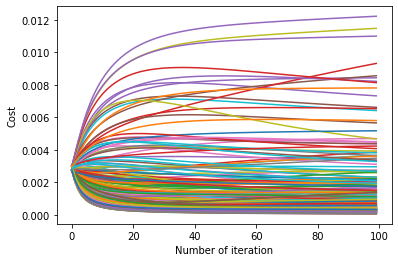

Test Accuracy: 44.26


In [37]:
logistic_regression(X_train, y_train, X_test, y_test, 1, 100)

In [84]:
accuracies = {}

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1).fit(X_train.T, y_train.T)

print('Train accuracy: {:.2f}'.format(lr.score(X_test.T, y_test.T)))
print('Test accuracy: {:.2f}'.format(lr.score(X_train.T, y_train.T)))
accuracies['LogisticRegression'] = lr.score(X_test.T, y_test.T)

Train accuracy: 0.87
Test accuracy: 0.86


In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train.T, y_train.T)

print('Accuracy train: {:.2f}'.format(knn.score(X_train.T, y_train.T)))
print('Accuracy test: {:.2f}'.format(knn.score(X_test.T, y_test.T)))
accuracies['KNeighborsClassifier'] = knn.score(X_test.T, y_test.T)

Accuracy train: 0.87
Accuracy test: 0.89


No handles with labels found to put in legend.


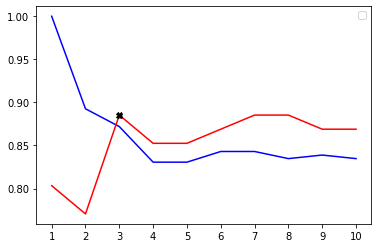

In [62]:
# Graph knn
scoreTrain = []
scoreTest = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train.T, y_train.T)
  scoreTrain.append(knn.score(X_train.T, y_train.T))
  scoreTest.append(knn.score(X_test.T, y_test.T))

plt.plot(range(1,11), scoreTrain, c='blue')
plt.plot(range(1,11), scoreTest, c='red')
plt.plot(3, scoreTest[2], 'X', c='black')
plt.xticks(range(1,11))
plt.legend(loc=1)
plt.show()

In [89]:
from sklearn.svm import SVC

svm = SVC(probability=True, C=1).fit(X_train.T, y_train.T)

print('Train score: {:.2f}'.format(svm.score(X_train.T, y_train.T)))
print('Test score: {:.2f}'.format(svm.score(X_test.T, y_test.T)))
accuracies['SVC'] = svm.score(X_test.T, y_test.T)

Train score: 0.86
Test score: 0.89


In [90]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train.T, y_train.T)

print('Train score: {:.2f}'.format(nb.score(X_train.T, y_train.T)))
print('Test score: {:.2f}'.format(nb.score(X_test.T, y_test.T)))
accuracies['GaussianNB'] = nb.score(X_test.T, y_test.T)

Train score: 0.85
Test score: 0.87


In [92]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3).fit(X_train.T, y_train.T)

print('Train score: {:.2f}'.format(tree.score(X_train.T, y_train.T)))
print('Test score: {:.2f}'.format(tree.score(X_test.T, y_test.T)))
accuracies['DecisionTreeClassifier'] = tree.score(X_test.T, y_test.T)

Train score: 0.86
Test score: 0.85


In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=3).fit(X_train.T, y_train.T)

print('Train score: {:.2f}'.format(rfc.score(X_train.T, y_train.T)))
print('Test score: {:.2f}'.format(rfc.score(X_test.T, y_test.T)))
accuracies['RandomForestClassifier'] = rfc.score(X_test.T, y_test.T)

Train score: 0.87
Test score: 0.87


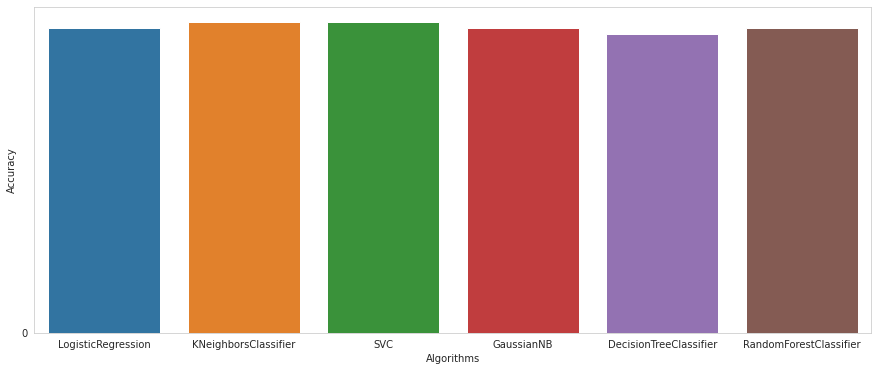

In [111]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0,100,10))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

In [112]:
y_head_lr = lr.predict(X_test.T)
y_head_knn = knn.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_tree = tree.predict(X_test.T)
y_head_rfc = rfc.predict(X_test.T)

In [119]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_tree = confusion_matrix(y_test, y_head_tree)
cm_rfc = confusion_matrix(y_test, y_head_rfc)

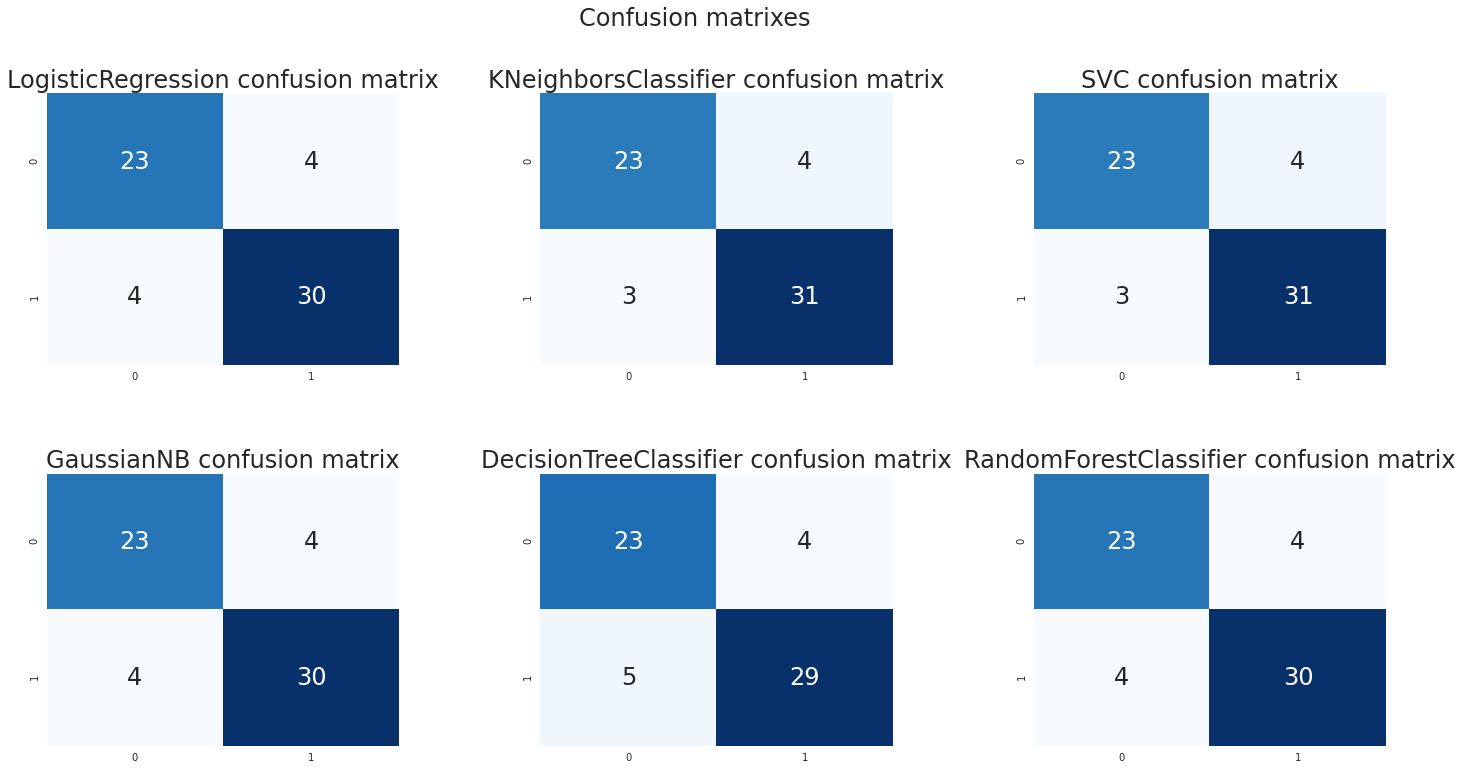

In [131]:
plt.figure(figsize=(24,12))

plt.suptitle('Confusion matrixes', fontsize=24)
plt.subplots_adjust(wspace=.4, hspace=.4)

plt.subplot(2, 3, 1)
plt.title('LogisticRegression confusion matrix', fontsize=24)
sns.heatmap(cm_lr, cmap='Blues', annot=True, cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 2)
plt.title('KNeighborsClassifier confusion matrix', fontsize=24)
sns.heatmap(cm_knn, cmap='Blues', annot=True, cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 3)
plt.title('SVC confusion matrix', fontsize=24)
sns.heatmap(cm_svm, cmap='Blues', cbar=False, annot=True, annot_kws={'size':24})

plt.subplot(2, 3, 4)
plt.title('GaussianNB confusion matrix', fontsize=24)
sns.heatmap(cm_nb, cmap='Blues', annot=True, cbar=False, annot_kws={'size':24})

plt.subplot(2, 3, 5)
plt.title('DecisionTreeClassifier confusion matrix', fontsize=24)
sns.heatmap(cm_tree, annot=True, cbar=False, cmap='Blues', annot_kws={'size':24})

plt.subplot(2, 3, 6)
plt.title('RandomForestClassifier confusion matrix', fontsize=24)
sns.heatmap(cm_rfc, cmap='Blues', cbar=False, annot=True, annot_kws={'size':24})

plt.show()